In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\dell1\Downloads\car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In this data there is no missing values

In [7]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [8]:
col=['Year', 'Price']

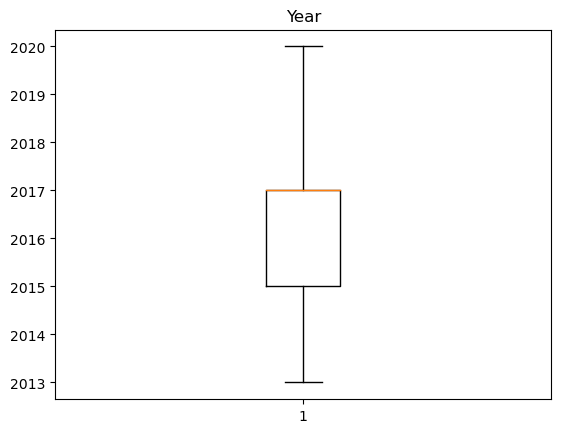

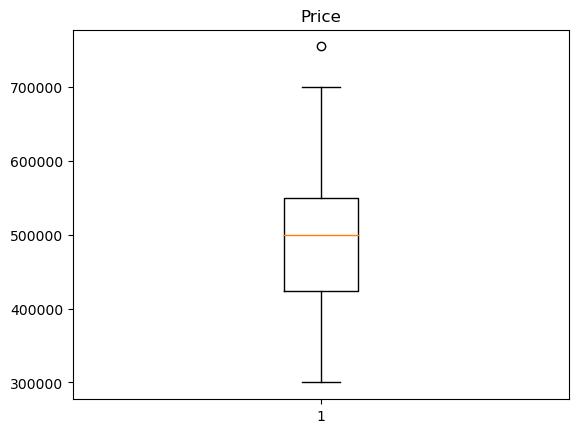

In [9]:
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

Since there is only one outlier, for time being we are not removing it 

<Axes: >

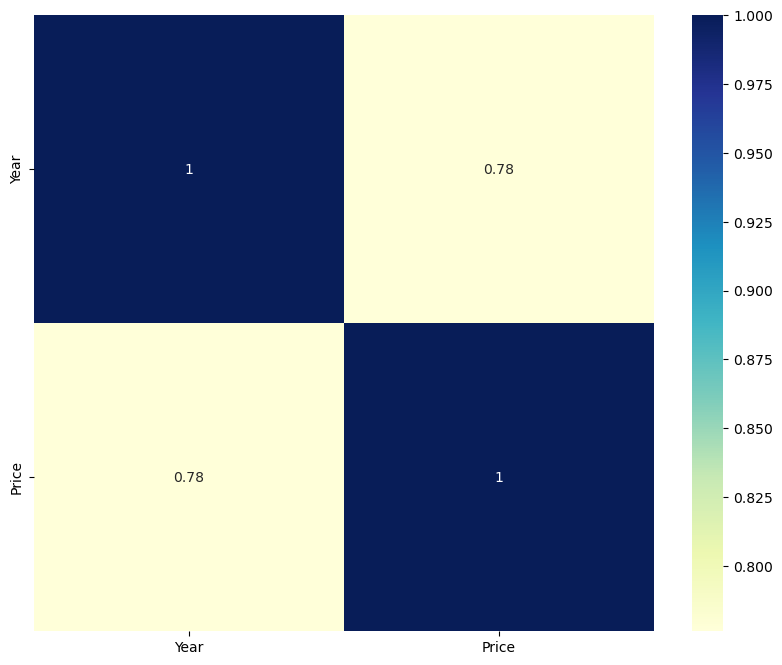

In [10]:
corr_graph=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr_graph,cmap="YlGnBu",annot=True)

In [11]:
x=data.drop("Price",axis=1)
y=data['Price']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)
lr = LinearRegression()

In [14]:
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3768613284.4777937
0.5933157772735583


Here we got a model with r2_score 0.5933157772735583

In [15]:
a=model.predict([[2022]])

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
a

array([707090.45052524])

The value predicted for 2022 is 707090.45052524

# Lasso Regression

In [17]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1)
lasso= lasso_model.fit(x,y)
lasso_preds=lasso_model.predict(x_test)

In [18]:
print(mean_squared_error(y_test,lasso_preds))
print(r2_score(y_test,lasso_preds))

3605677195.571053
0.6108987797386961


Here we got a model with r2_score 0.6108987797386961

In [20]:
a=lasso.predict([[2022]])

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [21]:
a

array([715487.87598363])

The value predicted for 2022 is 715487.87598363

Since here is only one independent variable, the lasso,linear regression estimates are almost same. There is a small difference between them

# MinMax Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x = minmax.fit_transform(x)

In [23]:
type(x)

numpy.ndarray

In [24]:
x=pd.DataFrame(x)

In [25]:
x.describe()

,0
count,112.000000
mean,0.524235
std,0.232802
min,0.000000
25%,0.285714
50%,0.571429
75%,0.571429
max,1.000000


In [26]:
y=data["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)
lr = LinearRegression()
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3768613284.4775224
0.5933157772735875


There is no differnce between the results.
MinMax Scaling has no effect.

In [30]:
a=model.predict([[2022]])

In [31]:
a

array([5.84468388e+08])

Lasso regression on scaled values

In [27]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1)
lasso= lasso_model.fit(x,y)
lasso_preds=lasso_model.predict(x_test)

In [28]:
print(mean_squared_error(y_test,lasso_preds))

3605685416.880788


In [29]:
print(r2_score(y_test,lasso_preds))

0.6108978925484468


In [32]:
a=lasso.predict([[2022]])

In [33]:
a

array([6.15359783e+08])

# Removing of Outliers

In [34]:
Q1 = np.percentile(data["Price"],25,method="midpoint")
Q2 = np.percentile(data['Price'],50,method="midpoint")
Q3 = np.percentile(data['Price'],75,method="midpoint") 

In [35]:
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [36]:
IQR=Q3-Q1

In [37]:
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [38]:
print(upp_lim)
print(low_lim)

741250.0
231250.0


In [39]:
outliers=[]
for x in data["Price"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [40]:
outliers

[755000]

In [41]:
ind1 = data["Price"]>upp_lim
data.loc[ind1].index

Int64Index([1], dtype='int64')

In [42]:
data.drop([1],inplace=True)

In [43]:
data.shape

(111, 2)

In [44]:
x=data.drop("Price",axis=1)
y=data['Price']

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)
lr = LinearRegression()

In [46]:
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2402810326.146175
0.659461083010504


There is a small difference between the values with or without removing outliers.

In [47]:
a=model.predict([[2022]])

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
a

array([696251.90227224])

Lasso regression on outlier removed data

In [49]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1)
lasso= lasso_model.fit(x,y)
lasso_preds=lasso_model.predict(x_test)

In [50]:
print(mean_squared_error(y_test,lasso_preds))
print(r2_score(y_test,lasso_preds))

2299291994.720143
0.6741322453943117


As comparing to r2_score value this is the most appropriate model.

In [51]:
a=lasso.predict([[2022]])

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [52]:
a

array([706568.95517562])

The predicted value for 2022 is 706568.95517562